In [ ]:
#ANALISIS EXPLORATORIO DE DATOS

In [3]:
import pandas as pd

# Cargar los datos desde el archivo CSV
data = pd.read_csv('Mall_Customers.csv')

# Mostrar las primeras filas del DataFrame para entender la estructura de los datos
print("Primeras filas del DataFrame:")
print(data.head())

# Calcular estadísticas descriptivas para cada columna
print("\nEstadísticas descriptivas:")
print(data.describe())

Primeras filas del DataFrame:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Estadísticas descriptivas:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.00000

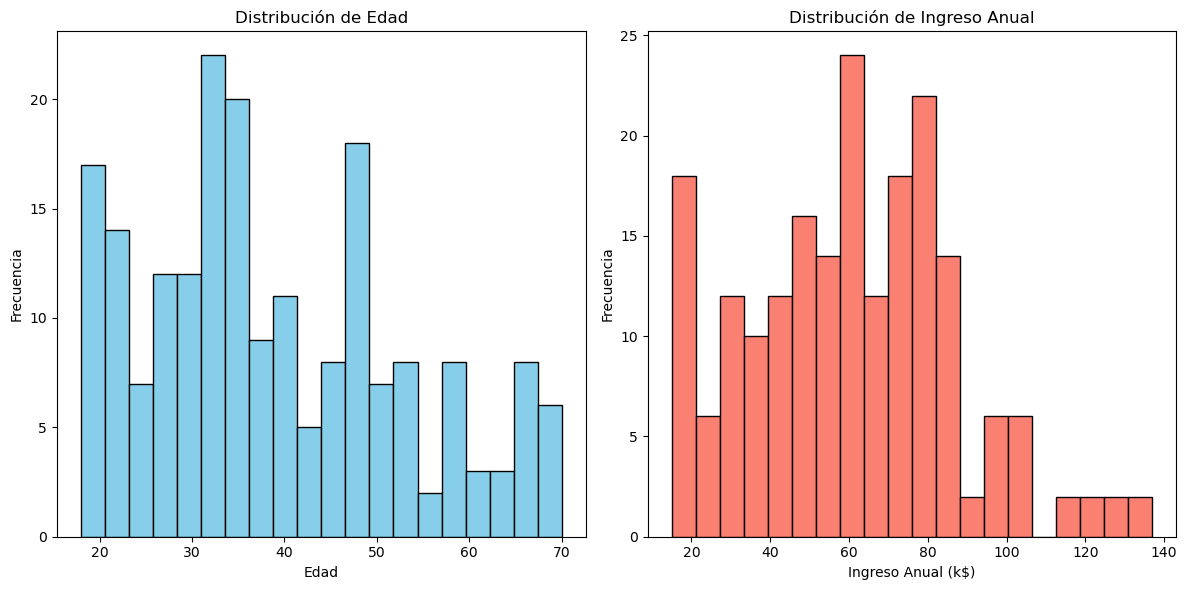

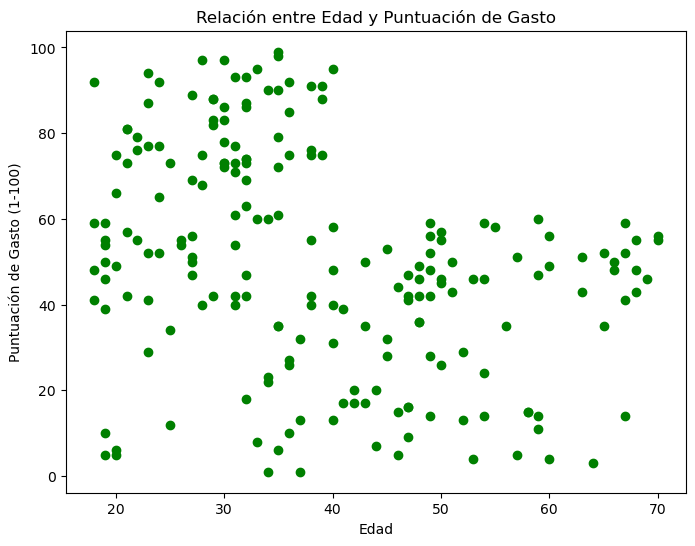

In [4]:
# Visualizar la distribución de las variables utilizando histogramas
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Histograma para la edad
plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Histograma para el ingreso anual
plt.subplot(1, 2, 2)
plt.hist(data['Annual Income (k$)'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Visualizar relaciones entre variables utilizando gráficos de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], color='green')
plt.title('Relación entre Edad y Puntuación de Gasto')
plt.xlabel('Edad')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.show()


In [ ]:
#TRATAMIENTO DE DATOS

In [5]:
# Verificar valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes:\n", missing_values)

Valores faltantes:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [23]:
# Manejar valores faltantes si los hay
data.dropna(inplace=True)

# Convertir variables categóricas a numéricas si es necesario
data_numeric = pd.get_dummies(data, columns=['Gender'])

# Visualizar los tipos de datos y las estadísticas descriptivas
print(data_numeric.info())
print(data_numeric.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Gender_Female           200 non-null    bool 
 5   Gender_Male             200 non-null    bool 
dtypes: bool(2), int64(4)
memory usage: 6.8 KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34

In [ ]:
#SELECCIONAR LAS CARACTERISTICAS MAS RELEVANTES

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Separar las características de la variable objetivo
X = data_numeric.drop(['CustomerID'], axis=1)
y = data_numeric['CustomerID']

# Entrenar un modelo de bosque aleatorio para evaluar la importancia de las características
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
print("Importancia de las características:")
print(feature_importance_df)


Importancia de las características:
                  Feature  Importance
2  Spending Score (1-100)    0.332893
1      Annual Income (k$)    0.310827
0                     Age    0.306575
3           Gender_Female    0.027124
4             Gender_Male    0.022581


In [ ]:
#ENTRENAR EL MODELO

In [25]:
from sklearn.cluster import KMeans

# Seleccionar características más relevantes
selected_features = feature_importance_df['Feature'].head(2).tolist()

# Entrenar el modelo de clustering (por ejemplo, k-means)
X_selected = X[selected_features]  # Usar solo las características seleccionadas
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_selected)

# Obtener las etiquetas de cluster asignadas a cada punto de datos
cluster_labels = kmeans.labels_

# Añadir las etiquetas de cluster al DataFrame de datos
data_clustered = data_numeric.copy()
data_clustered['Cluster'] = cluster_labels

# Visualizar las primeras filas del DataFrame con las etiquetas de cluster
print("Datos con etiquetas de cluster:")
print(data_clustered.head())


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Datos con etiquetas de cluster:
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0           1   19                  15                      39          False   
1           2   21                  15                      81          False   
2           3   20                  16                       6           True   
3           4   23                  16                      77           True   
4           5   31                  17                      40           True   

   Gender_Male  Cluster  
0         True        2  
1         True        3  
2        False        2  
3        False        3  
4        False        2  


In [ ]:
#EVALUAR EL DESEMPEÑO DEL MODELO

In [26]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calcular el Coeficiente de Silueta
silhouette_avg = silhouette_score(X_selected, cluster_labels)
print("Coeficiente de Silueta:", silhouette_avg)

# Calcular el Índice de Calinski-Harabasz
calinski_harabasz_score_value = calinski_harabasz_score(X_selected, cluster_labels)
print("Índice de Calinski-Harabasz:", calinski_harabasz_score_value)


Coeficiente de Silueta: 0.553931997444648
Índice de Calinski-Harabasz: 247.35899338037282


In [ ]:
#GRAFICOS

In [ ]:
#Grafico de dispercion

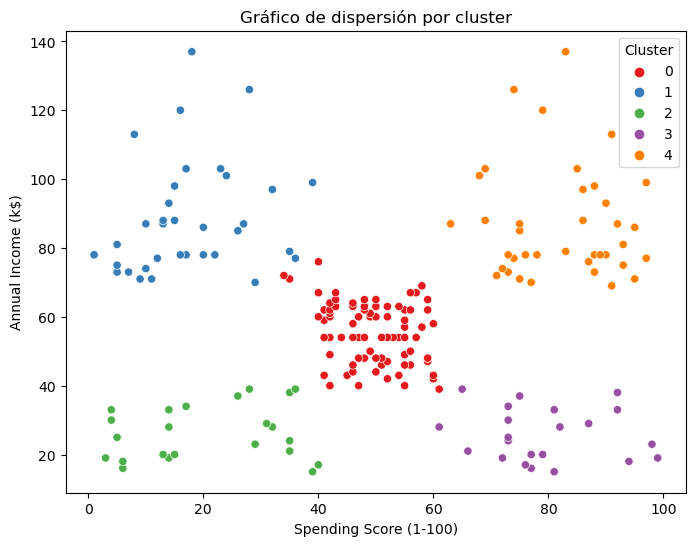

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión con colores por cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=selected_features[0], y=selected_features[1], hue='Cluster', data=data_clustered, palette='Set1')
plt.title('Gráfico de dispersión por cluster')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [ ]:
#DIAGRAMA DE CAJAS

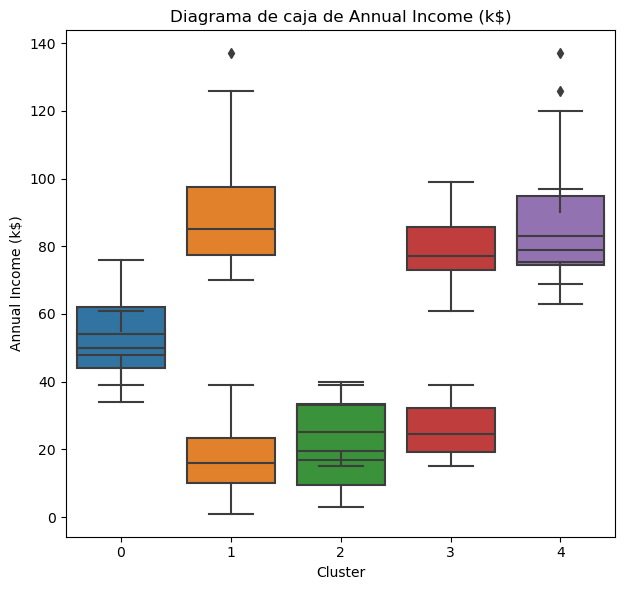

In [28]:
# Diagramas de caja de cada característica por cluster
plt.figure(figsize=(12, 6))
for feature in selected_features:
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Cluster', y=feature, data=data_clustered)
    plt.title('Diagrama de caja de {}'.format(feature))
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [30]:
#NUMERO OPTIMO DE CLUSTERS

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

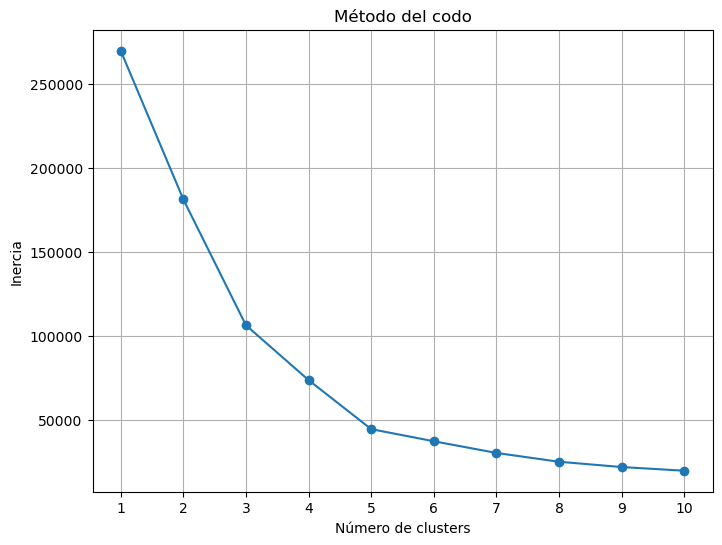

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para almacenar los valores de la inercia
inertia = []

# Probar diferentes números de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:
#METODO DE SILUETA

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

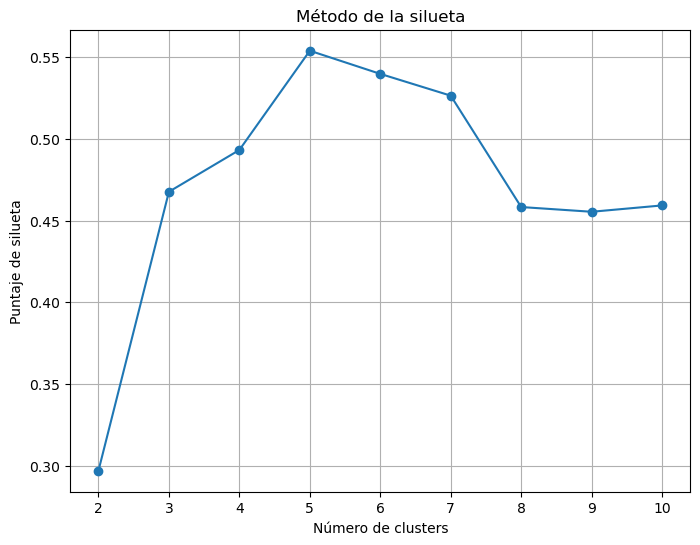

In [32]:
from sklearn.metrics import silhouette_score

# Lista para almacenar los valores de la silueta
silhouette_scores = []

# Probar diferentes números de clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_selected)
    silhouette_avg = silhouette_score(X_selected, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el método de la silueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método de la silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Puntaje de silueta')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


In [ ]:
#ENTRENAMIENTO DEL MODELO DE K-MEANS

In [35]:
# Seleccionar el número óptimo de clusters (por ejemplo, 5)
optimal_k = 5

# Entrenar el modelo de K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_selected)

# Añadir las etiquetas de cluster al DataFrame original
data_clustered['KMeans_Cluster'] = cluster_labels


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
#VISUALIZACIÓN DE LOS CLUSTERS Y ANÁLISIS DE LOS RESULTADOS

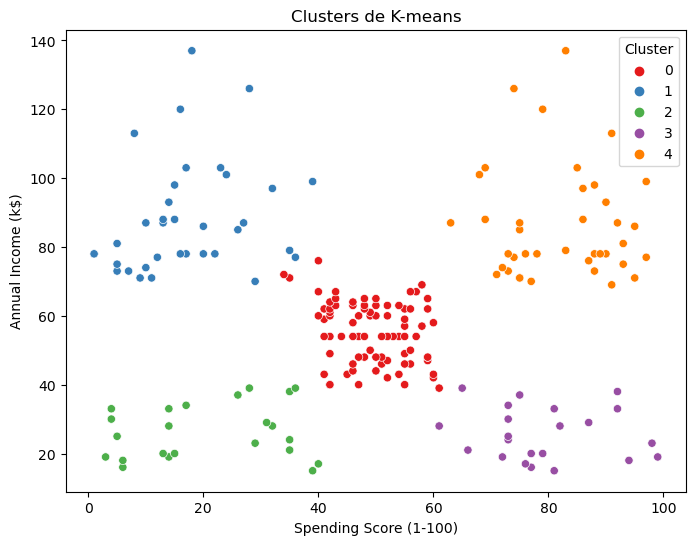

In [36]:
# Visualización de los clusters en el espacio de las características seleccionadas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=selected_features[0], y=selected_features[1], hue='KMeans_Cluster', data=data_clustered, palette='Set1')
plt.title('Clusters de K-means')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend(title='Cluster', loc='upper right')
plt.show()
